In [5]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

import pandas as pd
from sodapy import Socrata
from passwords import *

#  Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.ny.gov", token)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.ny.gov,
#                  MyAppToken,
#                  username="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
card = "Metrocard - Fair Fare"

query = f"fare_class_category='{card}'"


results = client.get("wujg-7c2s", where=query, limit=300000) # increase limit if you want more data
#results = client.get("wujg-7c2s", limit=2000) # increase limit if you want more data

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

C:\Users\sasha\AppData\Local\Temp\ipykernel_24256\2330709293.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  percentage23["Percentage"] = percentage23["New York city, New York!!Households!!Estimate"].apply(lambda x: str(x).strip('%'))
C:\Users\sasha\AppData\Local\Temp\ipykernel_24256\2330709293.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  percentage23["Percentage"] = percentage23["Percentage"].str.replace(',', '').astype(float)
C:\Users\sasha\AppData\Local\Temp\ipykernel_24256\2330709293.py:88:

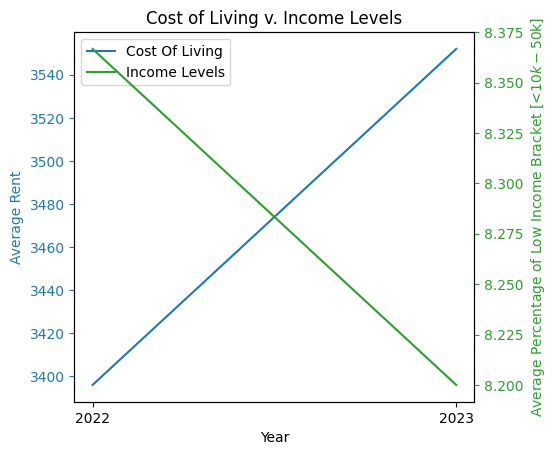

In [76]:
# importing packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# all arguments should be strings

def plot_graph(data_set, x_values, y_values, title, x_label, y_label): 
    plt.figure().set_figwidth(20)
    plt.plot(x_values, y_values)
    plt.xticks(rotation=70)
    #plt.set_xticks(np.arange(len(data_set)))
    #plt.set_xticklabels(data_set[x_values])
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()
# loading dataset
#data = sns.load_dataset("iris")
# draw lineplot
#sns.lineplot(x="sepal_length", y="sepal_width", data=data)

# Load the custom dataset (for example, a CSV file)
data = pd.read_csv("City_zori_uc_sfrcondomfr_sm_month.csv")  # Replace with your file path
cols_list = data.columns.tolist()
l = cols_list[92:]
#print(l)
#print(len(l))
#print(len(cols_list))

# drop dates that are unnecessary
data.drop(data.columns[data.columns.get_loc('2015-01-31'):data.columns.get_loc('2021-12-31')+1],axis=1,inplace=True)
# get new york data
state_data = data[data['State']=='NY']
# get nyc data
state_data = state_data[state_data['RegionName']=='New York']


#store list of avg rents into a list called y_vals
y_vals = [] 
rent_2022 = []
rent_2023 = []
# rent_2024 = []
state_data.drop(state_data.columns[state_data.columns.get_loc('RegionID'):state_data.columns.get_loc('2022-01-31')],axis=1,inplace=True)
#new_data = state_data.loc[:, '2022-01-31':]
for column in state_data: 
    #print(type(state_data[column]))
    if (column.split('-')[0] == '2022'): 
        rent_2022.append(int(state_data[column].item()))
    elif (column.split('-')[0] == '2023'):
        rent_2023.append(int(state_data[column].item()))
    # elif (column.split('-')[0] == '2024'): 
    #     rent_2024.append(int(state_data[column].item()))

    y_vals.append(int(state_data[column].item()))

avg_rent_2022 = int(sum(rent_2022)/len(rent_2022))
avg_rent_2023 = int(sum(rent_2023)/len(rent_2023))
#avg_rent_2024 = int(sum(rent_2024)/len(rent_2024))

new_y_vals = [avg_rent_2022, avg_rent_2023]
#print(len(y_vals))

#plot graph of living costs
#plot_graph(state_data, l,y_vals, 'Rise in Living Cost Since 2022', 'year','average rent')

#state_data = state_data[state_data['2015-02-28']==""]
#print(state_data)
#print(state_data)
# Draw a lineplot using Seaborn
#sns.lineplot(x="", y="Grand Total", data=data)

# -------------------------------------------------------------------
# income
data23 = pd.read_csv('ACSST1Y2023.S1901-2024-09-28T014525.csv')
data22 = pd.read_csv('ACSST1Y2022.S1901-2024-09-28T025601.csv')

filtered23 = data23[data23['Label (Grouping)'].str.contains('Less than|to|or more', na=False)] # change this for up to 50k? idk
percentage23 = filtered23[['Label (Grouping)', 'New York city, New York!!Households!!Estimate']]

filtered22 = data22[data22['Label (Grouping)'].str.contains('Less than|to|or more', na=False)] # change this for up to 50k? idk
percentage22 = filtered22[['Label (Grouping)', 'New York city, New York!!Households!!Estimate']]

# remove percentages and commas
percentage23["Percentage"] = percentage23["New York city, New York!!Households!!Estimate"].apply(lambda x: str(x).strip('%'))
percentage23["Percentage"] = percentage23["Percentage"].str.replace(',', '').astype(float)

percentage22["Percentage"] = percentage22["New York city, New York!!Households!!Estimate"].apply(lambda x: str(x).strip('%'))
percentage22["Percentage"] = percentage22["Percentage"].str.replace(',', '').astype(float)

percentage_y_vals = []

percentage22.drop(percentage22.tail(4).index, inplace=True)
percentage_y_vals.append(percentage22["Percentage"].mean())

percentage23.drop(percentage23.tail(4).index, inplace=True)
percentage_y_vals.append(percentage23["Percentage"].mean())

fig, first = plt.subplots()
fig.subplots_adjust(right=0.75)
second = first.twinx()

p1, = first.plot([2022, 2023], new_y_vals, "C0", label='Cost Of Living')
p2, = second.plot([2022, 2023], percentage_y_vals, "C2", label='Income Levels')

first.set(xlabel="Year", ylabel="Average Rent")
second.set(ylabel="Average Percentage of Low Income Bracket [<$10k - $50k]")

first.yaxis.label.set_color(p1.get_color())
second.yaxis.label.set_color(p2.get_color())
first.set_xticks([2022, 2023])
first.tick_params(axis='y', colors=p1.get_color())
second.tick_params(axis='y', colors=p2.get_color())

first.legend(handles=[p1, p2])

plt.title('Cost of Living v. Income Levels')
plt.xlabel('Year')

plt.show()

In [6]:
results_df.infer_objects()

,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,georeference,:@computed_region_kjdx_g34t,:@computed_region_yamh_8v7k,:@computed_region_wbg7_3whc
0,2023-04-10T07:00:00.000,subway,612,"Lexington Av-53 St (E,M)/51 St (6)",Manhattan,metrocard,Metrocard - Fair Fare,10.0,0.0,40.757553,-73.969055,"{'type': 'Point', 'coordinates': [-73.969055, ...",2095,749,749
1,2023-04-10T07:00:00.000,subway,630,"Myrtle-Wyckoff Avs (L,M)",Brooklyn,metrocard,Metrocard - Students,47.0,5.0,40.699814,-73.91158,"{'type': 'Point', 'coordinates': [-73.91158, 4...",2090,894,820
2,2023-04-10T00:00:00.000,subway,629,Lorimer St (L)/Metropolitan Av (G),Brooklyn,metrocard,Metrocard - Fair Fare,1.0,0.0,40.71406,-73.95027,"{'type': 'Point', 'coordinates': [-73.95027, 4...",2090,894,889
3,2023-04-10T10:00:00.000,subway,273,"Queens Plaza (E,M,R)",Queens,metrocard,Metrocard - Unlimited 7-Day,65.0,0.0,40.748974,-73.93724,"{'type': 'Point', 'coordinates': [-73.93724, 4...",2137,196,873
4,2023-04-10T05:00:00.000,subway,157,"96 St (C,B)",Manhattan,omny,OMNY - Full Fare,8.0,0.0,40.79164,-73.9647,"{'type': 'Point', 'coordinates': [-73.9647, 40...",2095,749,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2023-04-10T11:00:00.000,subway,217,"170 St (B,D)",Bronx,metrocard,Metrocard - Students,13.0,3.0,40.839306,-73.9134,"{'type': 'Point', 'coordinates': [-73.9134, 40...",2032,307,652
1996,2023-04-10T16:00:00.000,subway,613,"Lexington Av (N,R,W)/59 St (4,5,6)",Manhattan,metrocard,Metrocard - Unlimited 30-Day,363.0,0.0,40.76266,-73.967255,"{'type': 'Point', 'coordinates': [-73.967255, ...",2095,749,749
1997,2023-04-10T01:00:00.000,subway,326,Franklin St (1),Manhattan,metrocard,Metrocard - Unlimited 30-Day,1.0,0.0,40.71932,-74.00689,"{'type': 'Point', 'coordinates': [-74.00689, 4...",2095,749,737
1998,2023-04-10T14:00:00.000,subway,326,Franklin St (1),Manhattan,metrocard,Metrocard - Seniors & Disability,9.0,0.0,40.71932,-74.00689,"{'type': 'Point', 'coordinates': [-74.00689, 4...",2095,749,737


In [21]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


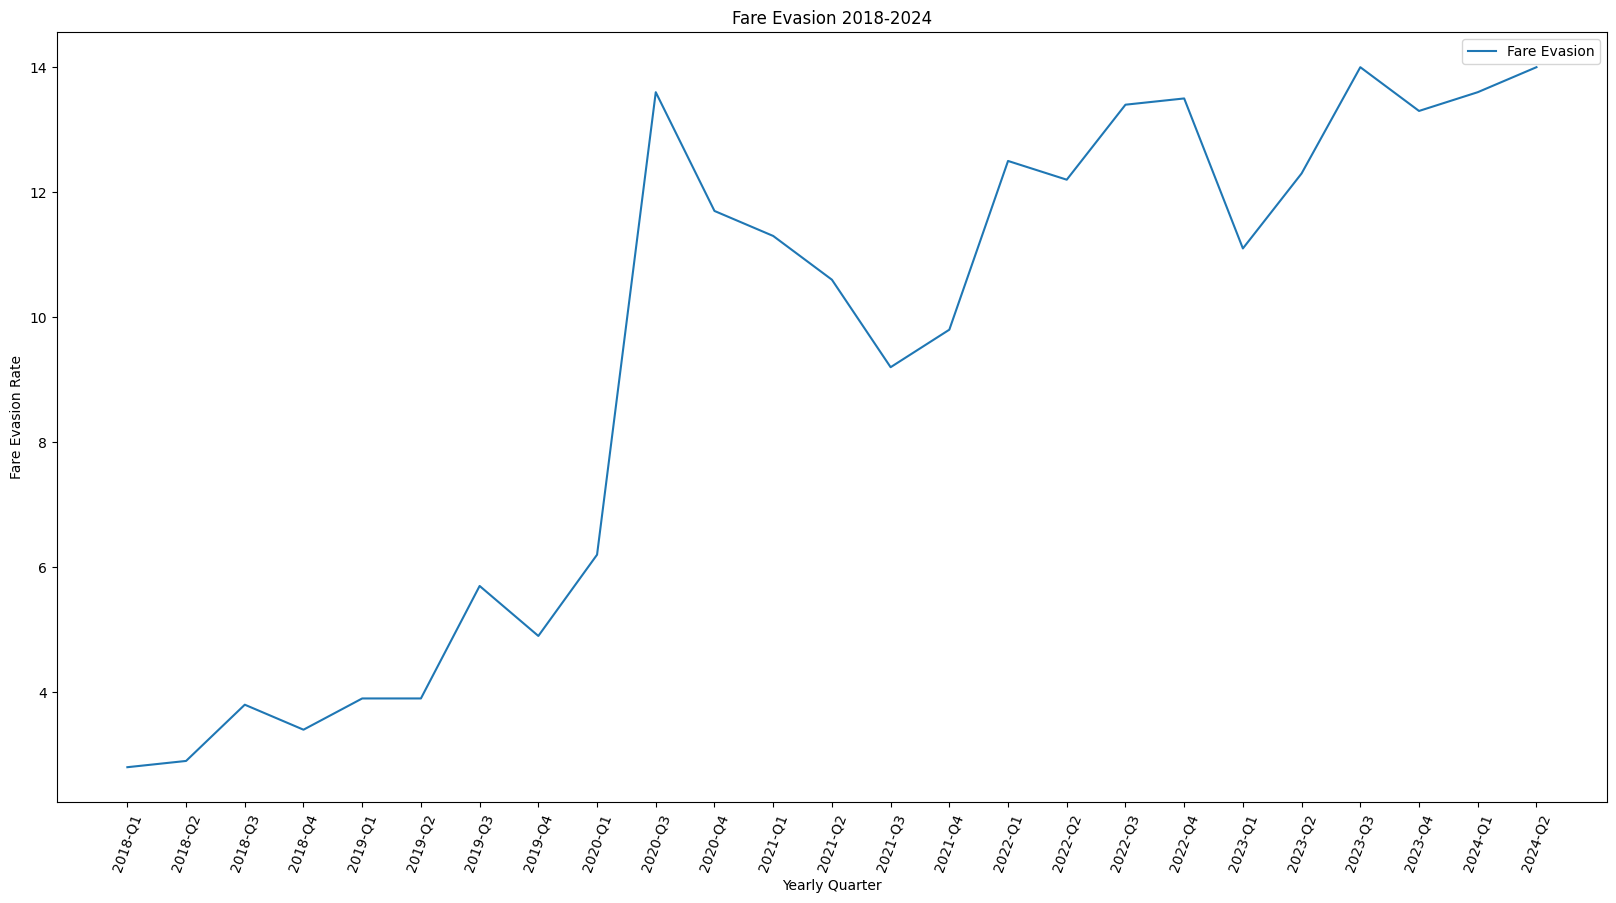

In [47]:
# importing packages
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
# loading dataset
#data = sns.load_dataset("iris")
# draw lineplot
#sns.lineplot(x="sepal_length", y="sepal_width", data=data)
# Load the custom dataset (for example, a CSV file)
data = pd.read_csv("MTA_NYCT_Subway_Fare_Evasion__Beginning_2018.csv", usecols=['Time Period','Fare Evasion'], skipinitialspace=True)  # Replace with your file path
data = data.dropna()
# print(data)
graph = data.plot(x='Time Period', y='Fare Evasion')
plt.gcf().set_size_inches(20,10)
plt.xticks(rotation=70)
graph.set_xticks(np.arange(len(data)))
graph.set_xticklabels(data['Time Period'])
plt.title('Fare Evasion 2018-2024')
plt.xlabel('Yearly Quarter')
plt.ylabel('Fare Evasion Rate')
plt.show()
# Draw a lineplot using Seaborn
#sns.lineplot(x="Transit District", y="Grand Total", data=data)

In [ ]:
y_vals = [] 
new_data = data.drop(data.columns[data.columns.get_loc('RegionID'):data.columns.get_loc('2022-01-31')+1],axis=1,inplace=True)
for column in new_data: 
    y_vals.append(new_data[column])


In [4]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   transit_timestamp            2000 non-null   object
 1   transit_mode                 2000 non-null   object
 2   station_complex_id           2000 non-null   object
 3   station_complex              2000 non-null   object
 4   borough                      2000 non-null   object
 5   payment_method               2000 non-null   object
 6   fare_class_category          2000 non-null   object
 7   ridership                    2000 non-null   object
 8   transfers                    2000 non-null   object
 9   latitude                     2000 non-null   object
 10  longitude                    2000 non-null   object
 11  georeference                 2000 non-null   object
 12  :@computed_region_kjdx_g34t  1969 non-null   object
 13  :@computed_region_yamh_8v7k  2000

In [3]:
results_df

,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,georeference,:@computed_region_kjdx_g34t,:@computed_region_yamh_8v7k,:@computed_region_wbg7_3whc
0,2022-03-21T14:00:00.000,subway,444,Gun Hill Rd (5),Bronx,metrocard,Metrocard - Seniors & Disability,3.0,1.0,40.869526,-73.84638,"{'type': 'Point', 'coordinates': [-73.84638, 4...",2032,307,706
1,2022-03-21T05:00:00.000,subway,451,Junction Blvd (7),Queens,metrocard,Metrocard - Unlimited 30-Day,68.0,0.0,40.749146,-73.86953,"{'type': 'Point', 'coordinates': [-73.86953, 4...",2137,196,843
2,2022-03-21T08:00:00.000,subway,440,"116 St (2,3)",Manhattan,metrocard,Metrocard - Unlimited 30-Day,144.0,0.0,40.802097,-73.94962,"{'type': 'Point', 'coordinates': [-73.94962, 4...",2095,749,753
3,2022-03-21T08:00:00.000,subway,44,"Church Av (B,Q)",Brooklyn,omny,OMNY - Full Fare,384.0,23.0,40.650528,-73.96298,"{'type': 'Point', 'coordinates': [-73.96298, 4...",2090,894,810
4,2022-03-21T04:00:00.000,subway,450,103 St-Corona Plaza (7),Queens,metrocard,Metrocard - Seniors & Disability,1.0,0.0,40.749866,-73.8627,"{'type': 'Point', 'coordinates': [-73.8627, 40...",2137,196,838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2022-03-21T17:00:00.000,subway,452,90 St-Elmhurst Av (7),Queens,metrocard,Metrocard - Students,33.0,1.0,40.74841,-73.87661,"{'type': 'Point', 'coordinates': [-73.87661, 4...",2137,196,843
1996,2022-03-30T19:00:00.000,subway,236,"Bergen St (F,G)",Brooklyn,metrocard,Metrocard - Fair Fare,12.0,0.0,40.686146,-73.99086,"{'type': 'Point', 'coordinates': [-73.99086, 4...",2090,894,880
1997,2022-03-21T18:00:00.000,subway,80,"121 St (J,Z)",Queens,metrocard,Metrocard - Full Fare,31.0,8.0,40.700493,-73.82829,"{'type': 'Point', 'coordinates': [-73.82829, 4...",2137,196,1165
1998,2022-03-30T09:00:00.000,subway,225,"47-50 Sts-Rockefeller Ctr (B,D,F,M)",Manhattan,metrocard,Metrocard - Full Fare,135.0,4.0,40.758663,-73.98133,"{'type': 'Point', 'coordinates': [-73.98133, 4...",2095,749,743
